In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")#, {"axes.facecolor": ".9"})
sns.set_context("paper")

## 0. Curated Datasets

In [3]:
my_path = './Results_earlys_new_nodrop/My_model/'
TCDF_path = './Results/TCDF/'

folders = ['GSD/', 'HSC/', 'mCAD/', 'VSC/']

In [4]:
my_data = pd.DataFrame()

for folder in folders:
    path = os.path.join(my_path, folder) #iterate folders
    for el in os.listdir(path): 
        complete_path = os.path.join(path, el) #iterate files
        if os.path.isfile(complete_path):
            name = el.split(sep='.')[0]
            levels = el.split(sep='_')[-2]
            temp_df = pd.read_csv(complete_path)
            temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
            temp_df['model'] = 'new'
            temp_df['data_type'] = el.split(sep='_')[0]
            temp_df['levels'] = int(levels)
            my_data = my_data.append(temp_df).reset_index(drop=True)

In [5]:
TCDF_data = pd.DataFrame()

for folder in folders:
    path = os.path.join(TCDF_path, folder) #iterate folders
    for i,el in enumerate(os.listdir(path)): 
        complete_path = os.path.join(path, el) #iterate files
        if os.path.isfile(complete_path):
            name = el.split(sep='.')[0]
            levels = el.split(sep='_')[-2]
            temp_df = pd.read_csv(complete_path)
            temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
            temp_df['model'] = 'TCDF'
            temp_df['data_type'] = el.split(sep='_')[0]
            temp_df['levels'] = int(levels)
            TCDF_data = TCDF_data.append(temp_df).reset_index(drop=True)

In [6]:
results = my_data.append(TCDF_data).reset_index(drop=True)
drop_outs = np.array([int(el.split(sep='-')[-1]) for el in results['name']])
results["drop_outs"] = np.where(drop_outs > 49, drop_outs, 0)
results['model_level'] = results['model'] + '-' + results['levels'].astype(str)

In [7]:
results_level1 = results[results['levels']==1]

Text(0.5, 1.0, 'Drop out F-score')

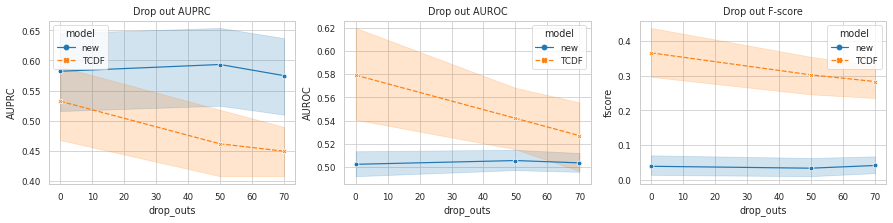

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.lineplot(data=results_level1, x="drop_outs", y="AUPRC", hue="model", style="model", markers=True, ax=axs[0])
axs[0].set_title('Drop out AUPRC')
sns.lineplot(data=results_level1, x="drop_outs", y="AUROC", hue="model", style="model", markers=True, ax=axs[1])
axs[1].set_title('Drop out AUROC')
sns.lineplot(data=results_level1, x="drop_outs", y="fscore", hue="model", style="model", markers=True, ax=axs[2])
axs[2].set_title('Drop out F-score')

Text(0.5, 1.0, 'Levels F-score')

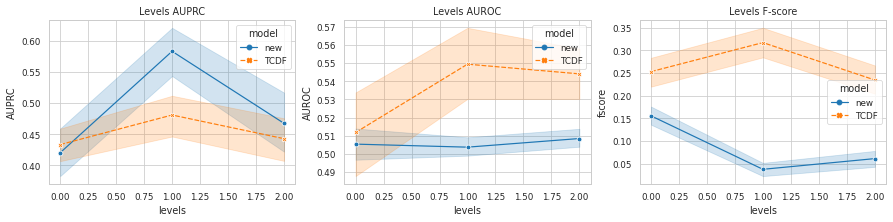

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.lineplot(data=results, x="levels", y="AUPRC", hue="model", style="model", markers=True, ax=axs[0])
axs[0].set_title('Levels AUPRC')
sns.lineplot(data=results, x="levels", y="AUROC", hue="model", style="model", markers=True, ax=axs[1])
axs[1].set_title('Levels AUROC')
sns.lineplot(data=results, x="levels", y="fscore", hue="model", style="model", markers=True, ax=axs[2])
axs[2].set_title('Levels F-score')

Text(0.5, 1.0, 'Curated Datasets F-score')

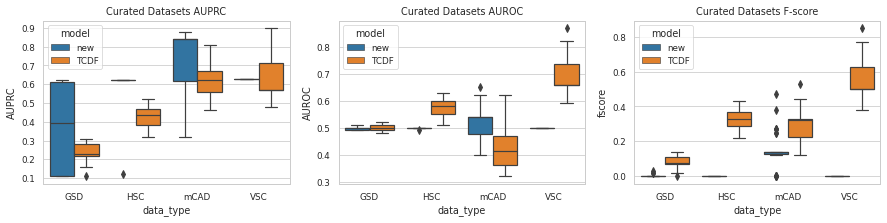

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.boxplot(data=results_level1, x="data_type", y="AUPRC", hue="model", ax=axs[0])
axs[0].set_title('Curated Datasets AUPRC')
sns.boxplot(data=results_level1, x="data_type", y="AUROC", hue="model", ax=axs[1])
axs[1].set_title('Curated Datasets AUROC')
sns.boxplot(data=results_level1, x="data_type", y="fscore", hue="model", ax=axs[2])
axs[2].set_title('Curated Datasets F-score')

Text(0.5, 1.0, 'Time')

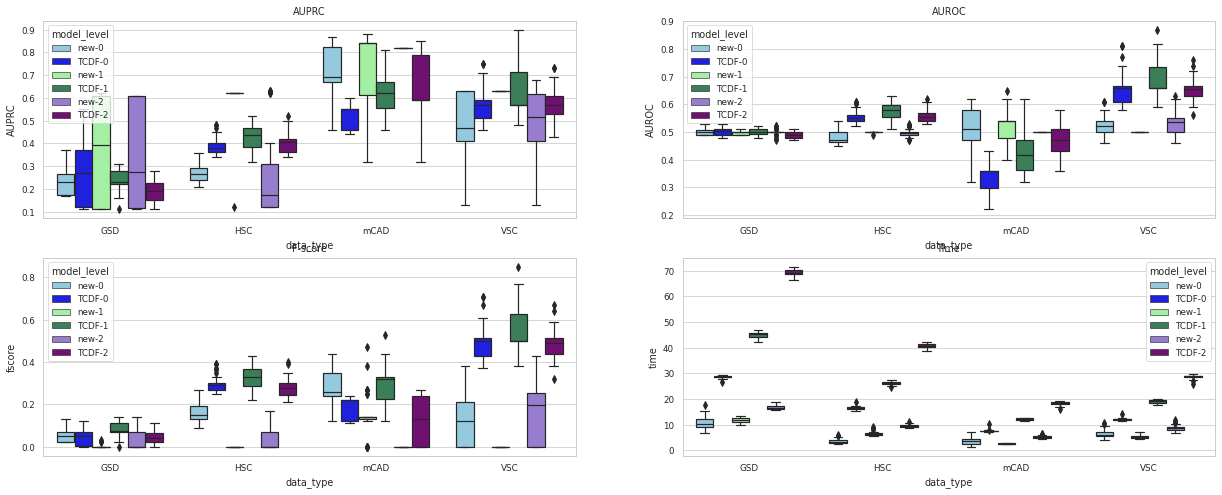

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(21,8))
my_pal = {"new-0": "skyblue", "new-1":"palegreen", "new-2":"mediumpurple",
          "TCDF-0": "b", "TCDF-1":"seagreen", "TCDF-2":"purple"}
order = ['new-0','TCDF-0', 'new-1', 'TCDF-1', 'new-2', 'TCDF-2']
sns.boxplot(x='data_type', y='AUPRC', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[0,0])
axs[0,0].set_title('AUPRC')
sns.boxplot(x='data_type', y='AUROC', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[0,1])
axs[0,1].set_title('AUROC')
sns.boxplot(x='data_type', y='fscore', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[1,0])
axs[1,0].set_title('F-score')
sns.boxplot(x='data_type', y='time', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[1,1])
axs[1,1].set_title('Time')

## 1. Synthetic Datasets

In [12]:
my_path = './Results_earlys_new_nodrop/My_model/'
TCDF_path = './Results/TCDF/'

folders = ['dyn-BF/', 'dyn-BFC/', 'dyn-CY/', 'dyn-LI/', 'dyn-LL/', 'dyn-TF/']

In [13]:
my_data = pd.DataFrame()

for folder in folders:
    path = os.path.join(my_path, folder) #iterate folders
    for el in os.listdir(path): 
        complete_path = os.path.join(path, el) #iterate files
        if os.path.isfile(complete_path):
            name = el.split(sep='.')[0]
            levels = el.split(sep='_')[-2]
            temp_df = pd.read_csv(complete_path)
            temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
            temp_df['model'] = 'new'
            temp_df['data_type'] = el.split(sep='_')[0]
            temp_df['levels'] = int(levels)
            my_data = my_data.append(temp_df).reset_index(drop=True)

In [14]:
TCDF_data = pd.DataFrame()

for folder in folders:
    path = os.path.join(TCDF_path, folder) #iterate folders
    for i,el in enumerate(os.listdir(path)): 
        complete_path = os.path.join(path, el) #iterate files
        if os.path.isfile(complete_path):
            name = el.split(sep='.')[0]
            levels = el.split(sep='_')[-2]
            temp_df = pd.read_csv(complete_path)
            temp_df.columns = ['name', 'fscore', 'AUPRC', 'AUROC', 'time']
            temp_df['model'] = 'TCDF'
            temp_df['data_type'] = el.split(sep='_')[0]
            temp_df['levels'] = int(levels)
            TCDF_data = TCDF_data.append(temp_df).reset_index(drop=True)

In [15]:
results = my_data.append(TCDF_data).reset_index(drop=True)
n_cells = np.array([int(el.split(sep='-')[-2]) for el in results['name']])
results["n_cells"] = n_cells
results['model_level'] = results['model'] + '-' + results['levels'].astype(str)

In [16]:
#results[(results['data_type']=='dyn-LI') & (results['model']=='TCDF')]

In [17]:
results_level1 = results[results['levels']==1]

Text(0.5, 1.0, 'Number of cells F-score')

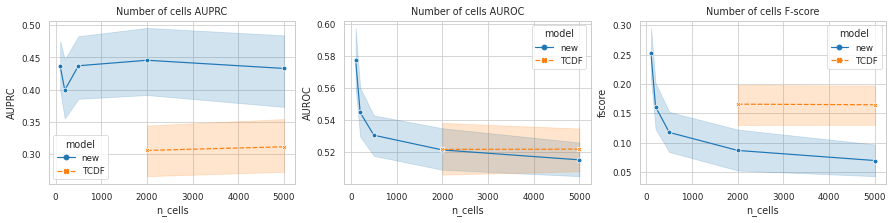

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.lineplot(data=results_level1, x="n_cells", y="AUPRC", hue="model", style="model", markers=True, ax=axs[0])
axs[0].set_title('Number of cells AUPRC')
sns.lineplot(data=results_level1, x="n_cells", y="AUROC", hue="model", style="model", markers=True, ax=axs[1])
axs[1].set_title('Number of cells AUROC')
sns.lineplot(data=results_level1, x="n_cells", y="fscore", hue="model", style="model", markers=True, ax=axs[2])
axs[2].set_title('Number of cells F-score')

Text(0.5, 1.0, 'Levels F-score')

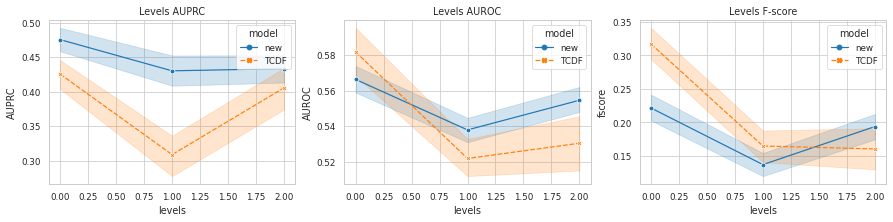

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.lineplot(data=results, x="levels", y="AUPRC", hue="model", style="model", markers=True, ax=axs[0])
axs[0].set_title('Levels AUPRC')
sns.lineplot(data=results, x="levels", y="AUROC", hue="model", style="model", markers=True, ax=axs[1])
axs[1].set_title('Levels AUROC')
sns.lineplot(data=results, x="levels", y="fscore", hue="model", style="model", markers=True, ax=axs[2])
axs[2].set_title('Levels F-score')

Text(0.5, 1.0, 'Synthetic Datasets F-score')

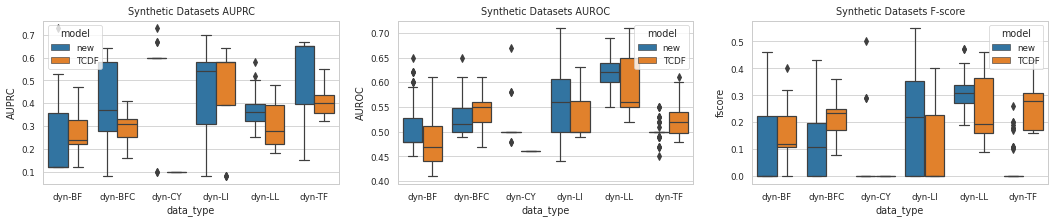

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=(18,3))

sns.boxplot(data=results_level1, x="data_type", y="AUPRC", hue="model", ax=axs[0])
axs[0].set_title('Synthetic Datasets AUPRC')
sns.boxplot(data=results_level1, x="data_type", y="AUROC", hue="model", ax=axs[1])
axs[1].set_title('Synthetic Datasets AUROC')
sns.boxplot(data=results_level1, x="data_type", y="fscore", hue="model", ax=axs[2])
axs[2].set_title('Synthetic Datasets F-score')

Text(0.5, 1.0, 'Time')

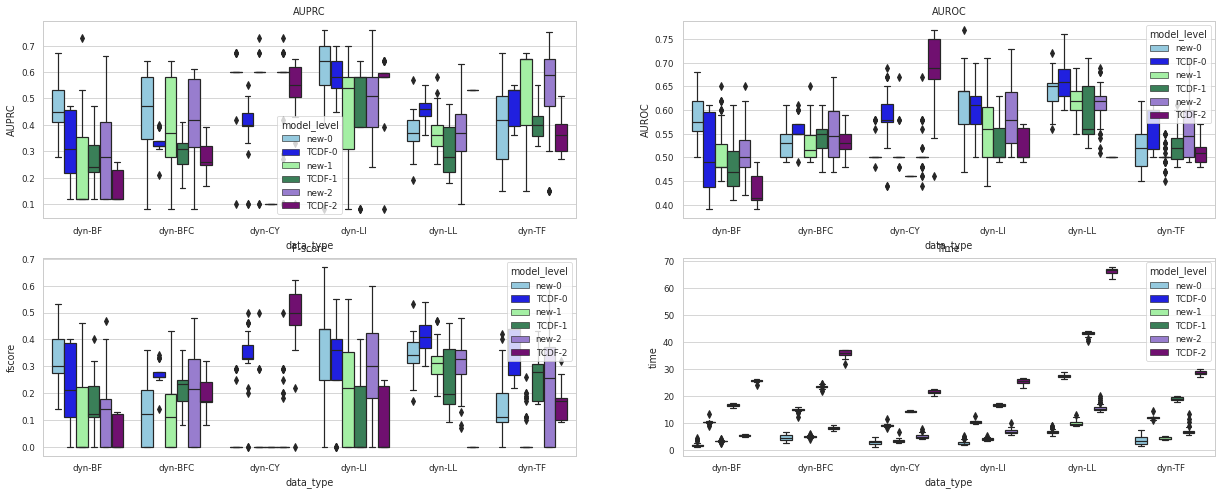

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(21,8))
my_pal = {"new-0": "skyblue", "new-1":"palegreen", "new-2":"mediumpurple",
          "TCDF-0": "b", "TCDF-1":"seagreen", "TCDF-2":"purple"}
order = ['new-0','TCDF-0', 'new-1', 'TCDF-1', 'new-2', 'TCDF-2']
sns.boxplot(x='data_type', y='AUPRC', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[0,0])
axs[0,0].set_title('AUPRC')
sns.boxplot(x='data_type', y='AUROC', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[0,1])
axs[0,1].set_title('AUROC')
sns.boxplot(x='data_type', y='fscore', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[1,0])
axs[1,0].set_title('F-score')
sns.boxplot(x='data_type', y='time', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[1,1])
axs[1,1].set_title('Time')

In [22]:
results_level0 = results[(results['model_level']=='new-0') | (results['model_level']=='TCDF-1')]

Text(0.5, 1.0, 'Number of cells F-score')

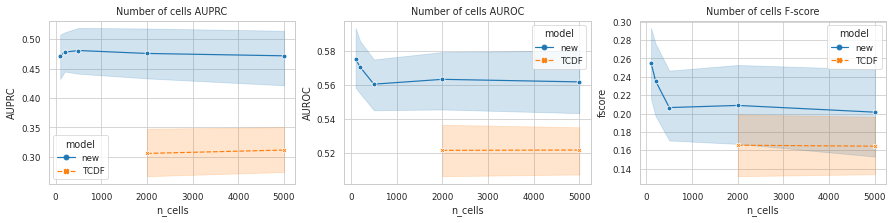

In [23]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.lineplot(data=results_level0, x="n_cells", y="AUPRC", hue="model", style="model", markers=True, ax=axs[0])
axs[0].set_title('Number of cells AUPRC')
sns.lineplot(data=results_level0, x="n_cells", y="AUROC", hue="model", style="model", markers=True, ax=axs[1])
axs[1].set_title('Number of cells AUROC')
sns.lineplot(data=results_level0, x="n_cells", y="fscore", hue="model", style="model", markers=True, ax=axs[2])
axs[2].set_title('Number of cells F-score')

Text(0.5, 1.0, 'Levels F-score')

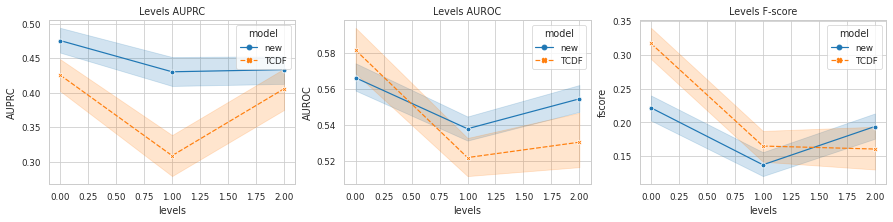

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.lineplot(data=results, x="levels", y="AUPRC", hue="model", style="model", markers=True, ax=axs[0])
axs[0].set_title('Levels AUPRC')
sns.lineplot(data=results, x="levels", y="AUROC", hue="model", style="model", markers=True, ax=axs[1])
axs[1].set_title('Levels AUROC')
sns.lineplot(data=results, x="levels", y="fscore", hue="model", style="model", markers=True, ax=axs[2])
axs[2].set_title('Levels F-score')

Text(0.5, 1.0, 'Synthetic Datasets F-score')

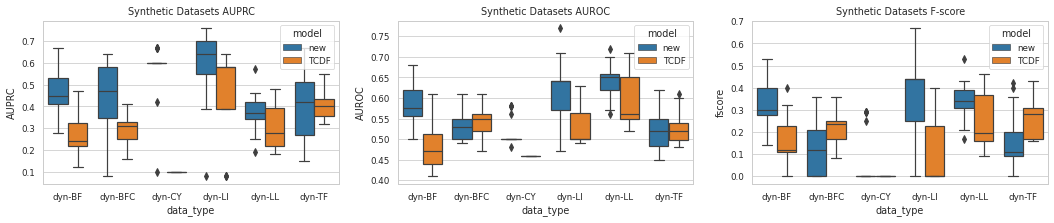

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(18,3))

sns.boxplot(data=results_level0, x="data_type", y="AUPRC", hue="model", ax=axs[0])
axs[0].set_title('Synthetic Datasets AUPRC')
sns.boxplot(data=results_level0, x="data_type", y="AUROC", hue="model", ax=axs[1])
axs[1].set_title('Synthetic Datasets AUROC')
sns.boxplot(data=results_level0, x="data_type", y="fscore", hue="model", ax=axs[2])
axs[2].set_title('Synthetic Datasets F-score')

Text(0.5, 1.0, 'Time')

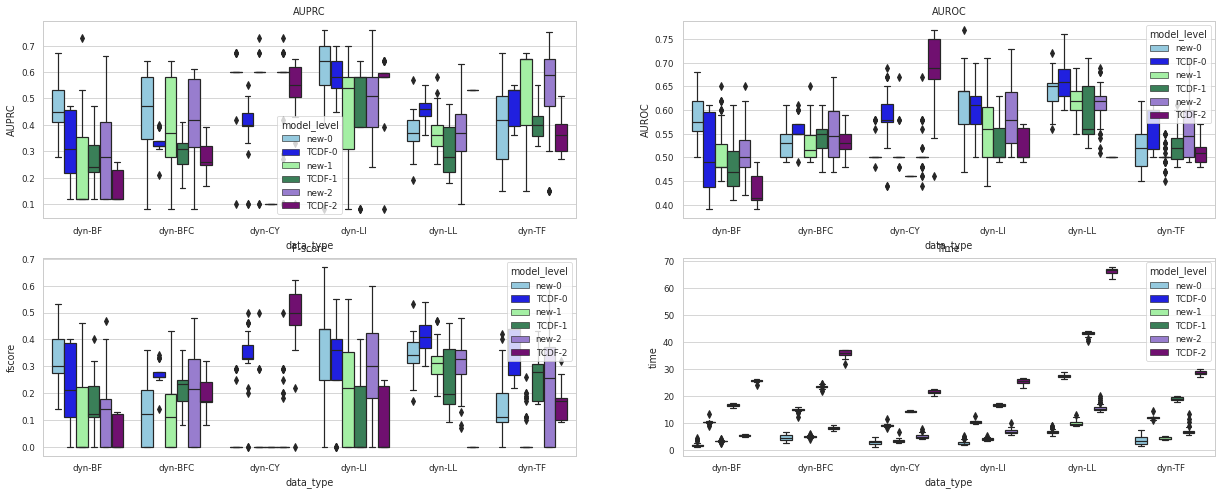

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(21,8))
my_pal = {"new-0": "skyblue", "new-1":"palegreen", "new-2":"mediumpurple",
          "TCDF-0": "b", "TCDF-1":"seagreen", "TCDF-2":"purple"}
order = ['new-0','TCDF-0', 'new-1', 'TCDF-1', 'new-2', 'TCDF-2']
sns.boxplot(x='data_type', y='AUPRC', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[0,0])
axs[0,0].set_title('AUPRC')
sns.boxplot(x='data_type', y='AUROC', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[0,1])
axs[0,1].set_title('AUROC')
sns.boxplot(x='data_type', y='fscore', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[1,0])
axs[1,0].set_title('F-score')
sns.boxplot(x='data_type', y='time', hue='model_level', hue_order = order, data=results, palette=my_pal, ax=axs[1,1])
axs[1,1].set_title('Time')